# Summary
<p>
This notebook is part of the IBM Applied Data Science Capstone on Coursera.<br>
It is the first part of the <b>Week 3, Peer-graded Assignment: Segmenting and Clustering Neighborhoods in Toronto.</b>
</p>     
    
<p>
<b>In particular it refers to the second part of the instructions below:</b><br>
Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood. 
</p> 

<p>
<b>The particular task is marked as "Part 2" below in the notebook.</b>
</p> 


# Import packages

In [51]:
import pandas as pd
import numpy as np

print("numpy version: ", np.__version__)
print("pandas version: ", pd.__version__)

numpy version:  1.16.5
pandas version:  0.25.1


In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import cm
import seaborn as sns

plt.rcParams['font.size'] = 11
plt.rcParams['font.style'] = 'italic'
plt.rcParams['font.family'] = 'monospace'


import math
import os
import types
import random
import warnings

In [53]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# !conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import geocoder 
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

# import k-means from clustering stage
from sklearn.cluster import KMeans
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# !conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from  bs4 import BeautifulSoup

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [54]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.4.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 58 Stepping 9, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 0.25.1
numpy            : 1.16.5
pytz             : 2019.3
dateutil         : 2.8.0
pip              : 19.2.3
setuptools       : 41.4.0
Cython           : 0.29.13
pytest           : 5.2.1
hypothesis       : None
sphinx           : 2.2.0
blosc            : None
feather          : None
xlsxwriter       : 1.2.1
lxml.etree       : 4.4.1
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.10.3
IPython          : 7.8.0
pandas_datareader: None
bs4              : 4.8.0
bottleneck       : 1.2.1
fastparquet      : None
gcsfs            : None
lxml.etree       : 4.4.1
matplotli

# Part 1

# Web Scraping


<p>
following the <b>instruction</b> of:<br> 
"using the notebook to code to scrape the following Wikipedia page, 
https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
</p> 

In [55]:


# Specify url: url
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M" 
# Package the request, send the request and catch the response: r
r = requests.get(url)
print(type(r))
# Extracts the response as html: html_doc
html_doc = r.text
print(type(html_doc))
# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc )
print(type(soup))
# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

<class 'requests.models.Response'>
<class 'str'>
<class 'bs4.BeautifulSoup'>


### Take a look at the requested text.

In [56]:
print(html_doc[:500])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>List of postal codes of Canada: M - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","


In [57]:
# Print the response
print(pretty_soup[10000:10500])

      North York
          </a>
         </td>
         <td>
          <a href="/wiki/Parkwoods" title="Parkwoods">
           Parkwoods
          </a>
         </td>
        </tr>
        <tr>
         <td>
          M4A
         </td>
         <td>
          <a href="/wiki/North_York" title="North York">
           North York
          </a>
         </td>
         <td>
          <a href="/wiki/Victoria_Village" title="Victoria Village">
           Victoria Village
          </a>
         </td>


In [58]:
print(soup.get_text()[:100])




List of postal codes of Canada: M - Wikipedia
document.documentElement.className="client-js";RLCO


In [59]:
print(soup.title)

<title>List of postal codes of Canada: M - Wikipedia</title>


# Transform the data in the table postal codes into a pandas dataframe

In [60]:
table_rows = soup.find_all('tr')

print(table_rows[:1])
print(" ")
print(table_rows[:2])

[<tr>
<th>Postcode</th>
<th>Borough</th>
<th>Neighbourhood
</th></tr>]
 
[<tr>
<th>Postcode</th>
<th>Borough</th>
<th>Neighbourhood
</th></tr>, <tr>
<td>M1A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>]


Using beautiful soap to transform HTML into a list.

In [61]:
l = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)

In [62]:
print(l[:][5])
print(len(l))

['M5A', 'Downtown Toronto', 'Harbourfront\n']
293


In [63]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', -1):
    # print(pd.DataFrame(l))

In [64]:
l[:10]

[[],
 ['M1A', 'Not assigned', 'Not assigned\n'],
 ['M2A', 'Not assigned', 'Not assigned\n'],
 ['M3A', 'North York', 'Parkwoods\n'],
 ['M4A', 'North York', 'Victoria Village\n'],
 ['M5A', 'Downtown Toronto', 'Harbourfront\n'],
 ['M6A', 'North York', 'Lawrence Heights\n'],
 ['M6A', 'North York', 'Lawrence Manor\n'],
 ['M7A', 'Downtown Toronto', "Queen's Park\n"],
 ['M8A', 'Not assigned', 'Not assigned\n']]

Cleaning the data frame.

In [65]:
zz = pd.DataFrame(l)
print(zz.shape)

(293, 31)


Drop rows without postal code information at the end of df.

In [66]:
jj = zz.drop(zz.index[289:293],axis=0)
jj.drop(jj.index[[0, 288]], axis=0, inplace=True)

Check

In [67]:
print(jj.shape)
len(jj.columns)

(287, 31)


31

Drop columns without postal code information from the df.

In [68]:
# creating a mask
io = jj.columns.tolist()[3:31]

In [69]:
ii = jj.drop(io, axis=1)

In [70]:
ii.shape

(287, 3)

In [71]:
ii.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 1 to 287
Data columns (total 3 columns):
0    287 non-null object
1    287 non-null object
2    287 non-null object
dtypes: object(3)
memory usage: 9.0+ KB


In [72]:
# ii.drop(ii.index[[0, 288]], axis=0, inplace=True)

In [73]:
ii.head()

,0,1,2
1,M1A,Not assigned,Not assigned\n
2,M2A,Not assigned,Not assigned\n
3,M3A,North York,Parkwoods\n
4,M4A,North York,Victoria Village\n
5,M5A,Downtown Toronto,Harbourfront\n


Replacing '\n' string.

In [74]:
ii.iloc[:,2] = ii.iloc[:,2].str.replace('\n','')
ii.tail()

,0,1,2
283,M8Z,Etobicoke,Mimico NW
284,M8Z,Etobicoke,The Queensway West
285,M8Z,Etobicoke,Royal York South West
286,M8Z,Etobicoke,South of Bloor
287,M9Z,Not assigned,Not assigned


Creating a header.

In [75]:
ii.columns = ['PostalCode', 'Borough', 'Neighbourhood']

In [76]:
ii.head()

,PostalCode,Borough,Neighbourhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront


In [77]:
ii.tail()

,PostalCode,Borough,Neighbourhood
283,M8Z,Etobicoke,Mimico NW
284,M8Z,Etobicoke,The Queensway West
285,M8Z,Etobicoke,Royal York South West
286,M8Z,Etobicoke,South of Bloor
287,M9Z,Not assigned,Not assigned


In [78]:
print(ii.shape)

(287, 3)


In [79]:
ii.isna().sum()

PostalCode       0
Borough          0
Neighbourhood    0
dtype: int64

In [80]:
postcodes = ii.copy()

In [81]:
postcodes.reset_index(inplace=True, drop=True)
# postcodes.head()

# Preparing the data frame according to instructions

## Ignore cells with a borough that is Not assigned

In [82]:
boolean_mask_2 = (postcodes.Borough != 'Not assigned')
postcodes = postcodes[boolean_mask_2]

In [83]:
print(postcodes.shape)
postcodes.head()

(210, 3)


,PostalCode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


## If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

In [84]:
mask_3 = \
(postcodes.Borough != 'Not assigned') & \
(postcodes.Neighbourhood == 'Not assigned') 


postcodes[mask_3]

,PostalCode,Borough,Neighbourhood


There is no record with this condition.

## Combine neighborhoods within the same postal code area

<p>
More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
</p> 



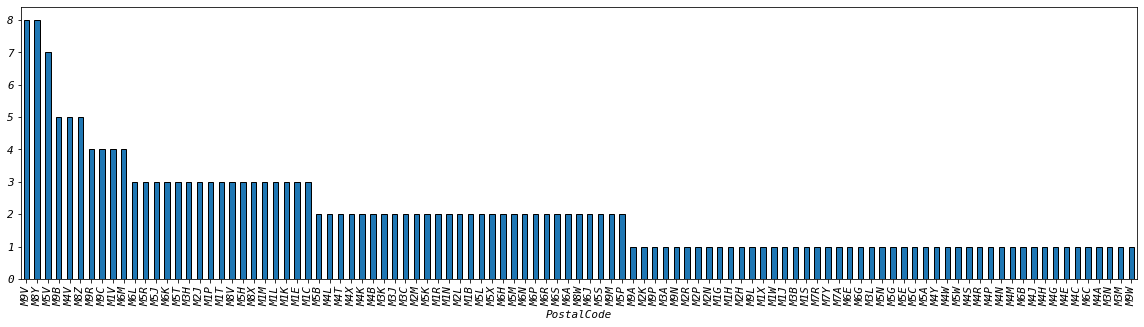

In [85]:
neighbourhood_gb = postcodes.groupby('PostalCode')['Neighbourhood'].count()

neighbourhood_gb.sort_values(ascending=False).plot.bar(figsize=(20,5), 
                 edgecolor='black')
plt.show()

In [86]:
postcodes.sort_values(by='PostalCode')[:5]

,PostalCode,Borough,Neighbourhood
10,M1B,Scarborough,Rouge
11,M1B,Scarborough,Malvern
28,M1C,Scarborough,Port Union
27,M1C,Scarborough,Rouge Hill
26,M1C,Scarborough,Highland Creek


Using Pandas groupby on Postalcode to cocatenate the neighbourhoods strings
of the Neighbourhood variable.

In [87]:
postcodes_gb = \
postcodes.groupby(['PostalCode','Borough'])['Neighbourhood'].apply(', '.join).reset_index()

In [88]:
postcodes_gb.head()

,PostalCode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [89]:
postcodes_gb.tail()

,PostalCode,Borough,Neighbourhood
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv..."
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ..."
102,M9W,Etobicoke,Northwest


In [90]:
postcodes_gb.shape

(103, 3)

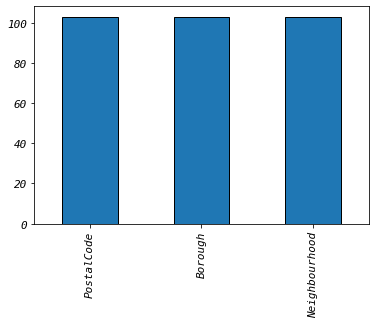

In [91]:
postcodes_gb.count().plot.bar(edgecolor='black')
plt.show()

The number of PostalCodes, Borough and Neighbourhoods is the same as all
neighbourhoods are now in the record of the unique postal code.

In [92]:
postcodes_gb.to_csv("PostalCodes_Canada.csv", index=False)

## In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [93]:
postcodes_gb.shape

(103, 3)

# Part 2

## Exploring of Toronto by mapping neighbourhoods

#### Getting the latitude and the longitude coordinates of each neighborhood. 

In [94]:
PostalCode = postcodes_gb.iloc[:,0]

In [95]:
# Geospatial_Coordinates.csv

coordinates = pd.read_csv('Geospatial_Coordinates.csv', header=0, sep=",")
print(coordinates.info())
print(coordinates.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 3 columns):
Postal Code    103 non-null object
Latitude       103 non-null float64
Longitude      103 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB
None
(103, 3)


In [96]:
postcodes_coordinates = \
postcodes_gb.merge(coordinates,  
                   left_on = 'PostalCode', 
                   right_on = 'Postal Code')

print(postcodes_coordinates.info())
postcodes_coordinates.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 6 columns):
PostalCode       103 non-null object
Borough          103 non-null object
Neighbourhood    103 non-null object
Postal Code      103 non-null object
Latitude         103 non-null float64
Longitude        103 non-null float64
dtypes: float64(2), object(4)
memory usage: 5.6+ KB
None


,PostalCode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",M1B,43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",M1C,43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711
3,M1G,Scarborough,Woburn,M1G,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,M1H,43.773136,-79.239476


In [97]:
postcodes_coordinates_2 = postcodes_coordinates.drop('Postal Code', axis=1)
postcodes_coordinates_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 5 columns):
PostalCode       103 non-null object
Borough          103 non-null object
Neighbourhood    103 non-null object
Latitude         103 non-null float64
Longitude        103 non-null float64
dtypes: float64(2), object(3)
memory usage: 4.8+ KB


In [98]:
toronto = postcodes_coordinates.copy()

#### Use geopy library to get the latitude and longitude values of Toronto.

In [99]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are: {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are: 43.653963, -79.387207.


#### Create a map of Toronto with neighborhoods superimposed on top.

In [100]:
# create map of Toronto  using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto['Latitude'], toronto['Longitude'], 
                                           toronto['Borough'], toronto['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto 

Let's simplify the above map and segment and cluster only the neighborhoods in Scarborough, Toronto. So let's slice the original dataframe and create a new dataframe of the Scarborough, Toronto data.

#### Create a map of Scarborough, Toronto with neighborhoods superimposed on top.

In [101]:
Scarborough_data = toronto[toronto['Borough'] == 'Scarborough'].reset_index(drop=True)
Scarborough_data.head()

,PostalCode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",M1B,43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",M1C,43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711
3,M1G,Scarborough,Woburn,M1G,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,M1H,43.773136,-79.239476


In [102]:
address = 'Scarborough, Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location_scar = geolocator.geocode(address)
latitude_scar = location_scar.latitude
longitude_scar = location_scar.longitude
print('The geograpical coordinate of Scarborough, Toronto are {}, {}.'.format(latitude_scar, longitude_scar))

The geograpical coordinate of Scarborough, Toronto are 43.773077, -79.257774.


Let's visualizat Scarborough, Toronto and the neighborhoods in it.

In [103]:
# create map of Scarborough using latitude and longitude values
map_Scarborough = folium.Map(location=[latitude_scar, longitude_scar], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Scarborough_data ['Latitude'], Scarborough_data['Longitude'], 
                           Scarborough_data ['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Scarborough)  
    
map_Scarborough

## Foursquare API

<p>
Utilizing the Foursquare API to explore the neighborhoods and segment them.
</p> 


In [104]:
CLIENT_ID = 'TEJ3ZQ1ULAYN4DSBSBTDSHCK12U2IES4RHGOR2GGNTF1NAK5' # your Foursquare ID
CLIENT_SECRET = 'RRVC2E1LVUFQHRDDLGSIHKRR3GPMIAKL5KTFSRP0E5EQNFBW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TEJ3ZQ1ULAYN4DSBSBTDSHCK12U2IES4RHGOR2GGNTF1NAK5
CLIENT_SECRET:RRVC2E1LVUFQHRDDLGSIHKRR3GPMIAKL5KTFSRP0E5EQNFBW


#### Let's explore the first neighborhood in the Scarborough_data dataframe.

<p>
Get the neighborhood's name.
</p> 


In [105]:
Scarborough_data.loc[0, 'Neighbourhood']

'Rouge, Malvern'

In [106]:
Rouge_latitude = Scarborough_data.loc[0, 'Latitude'] # neighborhood latitude value
Rouge_longitude = Scarborough_data.loc[0, 'Longitude'] # neighborhood longitude value

Rouge_name = Scarborough_data.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(Rouge_name, 
                                                               Rouge_latitude, 
                                                               Rouge_longitude))

Latitude and longitude values of Rouge, Malvern are 43.806686299999996, -79.19435340000001.


In [107]:
radius = 500 # define radius
LIMIT = 100 # limit of number of venues returned by Foursquare API

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Rouge_latitude, 
    Rouge_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=TEJ3ZQ1ULAYN4DSBSBTDSHCK12U2IES4RHGOR2GGNTF1NAK5&client_secret=RRVC2E1LVUFQHRDDLGSIHKRR3GPMIAKL5KTFSRP0E5EQNFBW&v=20180605&ll=43.806686299999996,-79.19435340000001&radius=500&limit=100'

In [108]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e713cbb71c428001bb1034e'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Malvern',
  'headerFullLocation': 'Malvern, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 43.8111863045, 'lng': -79.18812958073042},
   'sw': {'lat': 43.80218629549999, 'lng': -79.2005772192696}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bb6b9446edc76b0d771311c',
       'name': "Wendy's",
       'location': {'crossStreet': 'Morningside & Sheppard',
        'lat': 43.80744841934756,
        'lng': -79.19905558052072,
        'labeledLatLngs': [{'label': 'display'

In [109]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [110]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Wendy's,Fast Food Restaurant,43.807448,-79.199056
1,Interprovincial Group,Print Shop,43.805630,-79.200378


In [111]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

2 venues were returned by Foursquare.


In [112]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [113]:
# type your answer here

Scarborough_venues = getNearbyVenues(names=Scarborough_data['Neighbourhood'],
                                   latitudes=Scarborough_data['Latitude'],
                                   longitudes=Scarborough_data['Longitude']
                                   )



Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
